### CA1 – Machine Learning HDip
#### Author: Cristhian Macedo - 2024104
[GitHub Repository](https://github.com/CristhianMacedo2024104/Machine-Learning)

## 1. Data Understanding

### 1.1 Importing libraries

Importing the required libraries "`pandas`" to start the project.

Also importing "`numpy`", "`seaborn`", "`matplotlib.pyplot`" and "`sklearn.decomposition`", in case it needs other libraries it will be imported when necessary it comes.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

### 1.2	Loading Data from a CSV File

Loading the dataset using the function “`.read_csv`” to import the required data existing in the Comma-separated values "`.csv`" file in the `df` variable.

In [2]:
df = pd.read_csv("HPM04.20240416T220418.csv")

### 1.3	Inspecting the Data Set

The first command useful to start understanding the data is “`.head()`” to check the first 5 observations as default and features contained in the data frame after loaded. 

This command was important and necessary to get the first impression of it, returning that this dataset has **5** rows (observations) and **14** columns (features).

In [3]:
df.head(2)

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN


Thereafter using the command “`shape`” shows us the complete body of the data, in this case **336000** observations and **14** features to be analysed.

In [4]:
df.shape

(23491, 8)

Used “```.info()```” next to print a concise summary of a data frame.

Getting this information it was necessary to learn the names of features existing and the difference between the total of observations shown before in the “`shape`” command and their respective data types.

In [5]:
# df.info()

The "`.describe()`" function shows us a little more about each feature, we can see statistics information about: count, mean, standard deviation, min, Q1 25%, Q2 50%, Q3 75% and max 

In [6]:
# df.describe()

In [7]:
# pip install ydata-profiling

In [8]:
# from ydata_profiling import ProfileReport

# ProfileReport(df)

### 1.4 Checking types of data

In [9]:
df.columns

Index(['Statistic Label', 'Month', 'Dwelling Status', 'Eircode Output',
       'Stamp Duty Event', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

In [10]:
df.dtypes

Statistic Label      object
Month                object
Dwelling Status      object
Eircode Output       object
Stamp Duty Event     object
Type of Buyer        object
UNIT                 object
VALUE               float64
dtype: object

## 2. Data Preparation

### 2.1 Finding Unique Values

- Keeping the columns:  Month, UNIT
- Deleting: Stamp Duty Event
- Renaming: Statistic Label to Statistic_Label, Dwelling Status to Dwelling_Status, Eircode Output to Eircode, Type of Buyer to Type_Buyer, VALUE to Value

In [11]:
df.columns

Index(['Statistic Label', 'Month', 'Dwelling Status', 'Eircode Output',
       'Stamp Duty Event', 'Type of Buyer', 'UNIT', 'VALUE'],
      dtype='object')

In [12]:
df['Type of Buyer'].unique()

array(['Household Buyer - First-Time Buyer Owner-Occupier'], dtype=object)

In [13]:
df["Type of Buyer"].value_counts()

Type of Buyer
Household Buyer - First-Time Buyer Owner-Occupier    23491
Name: count, dtype: int64

In [14]:
df.isnull().sum()

Statistic Label        0
Month                  0
Dwelling Status        0
Eircode Output         0
Stamp Duty Event       0
Type of Buyer          0
UNIT                   0
VALUE               3189
dtype: int64

In [15]:
df.isnull().mean().round(2) * 100

Statistic Label      0.0
Month                0.0
Dwelling Status      0.0
Eircode Output       0.0
Stamp Duty Event     0.0
Type of Buyer        0.0
UNIT                 0.0
VALUE               14.0
dtype: float64

In [16]:
# pip install missingno

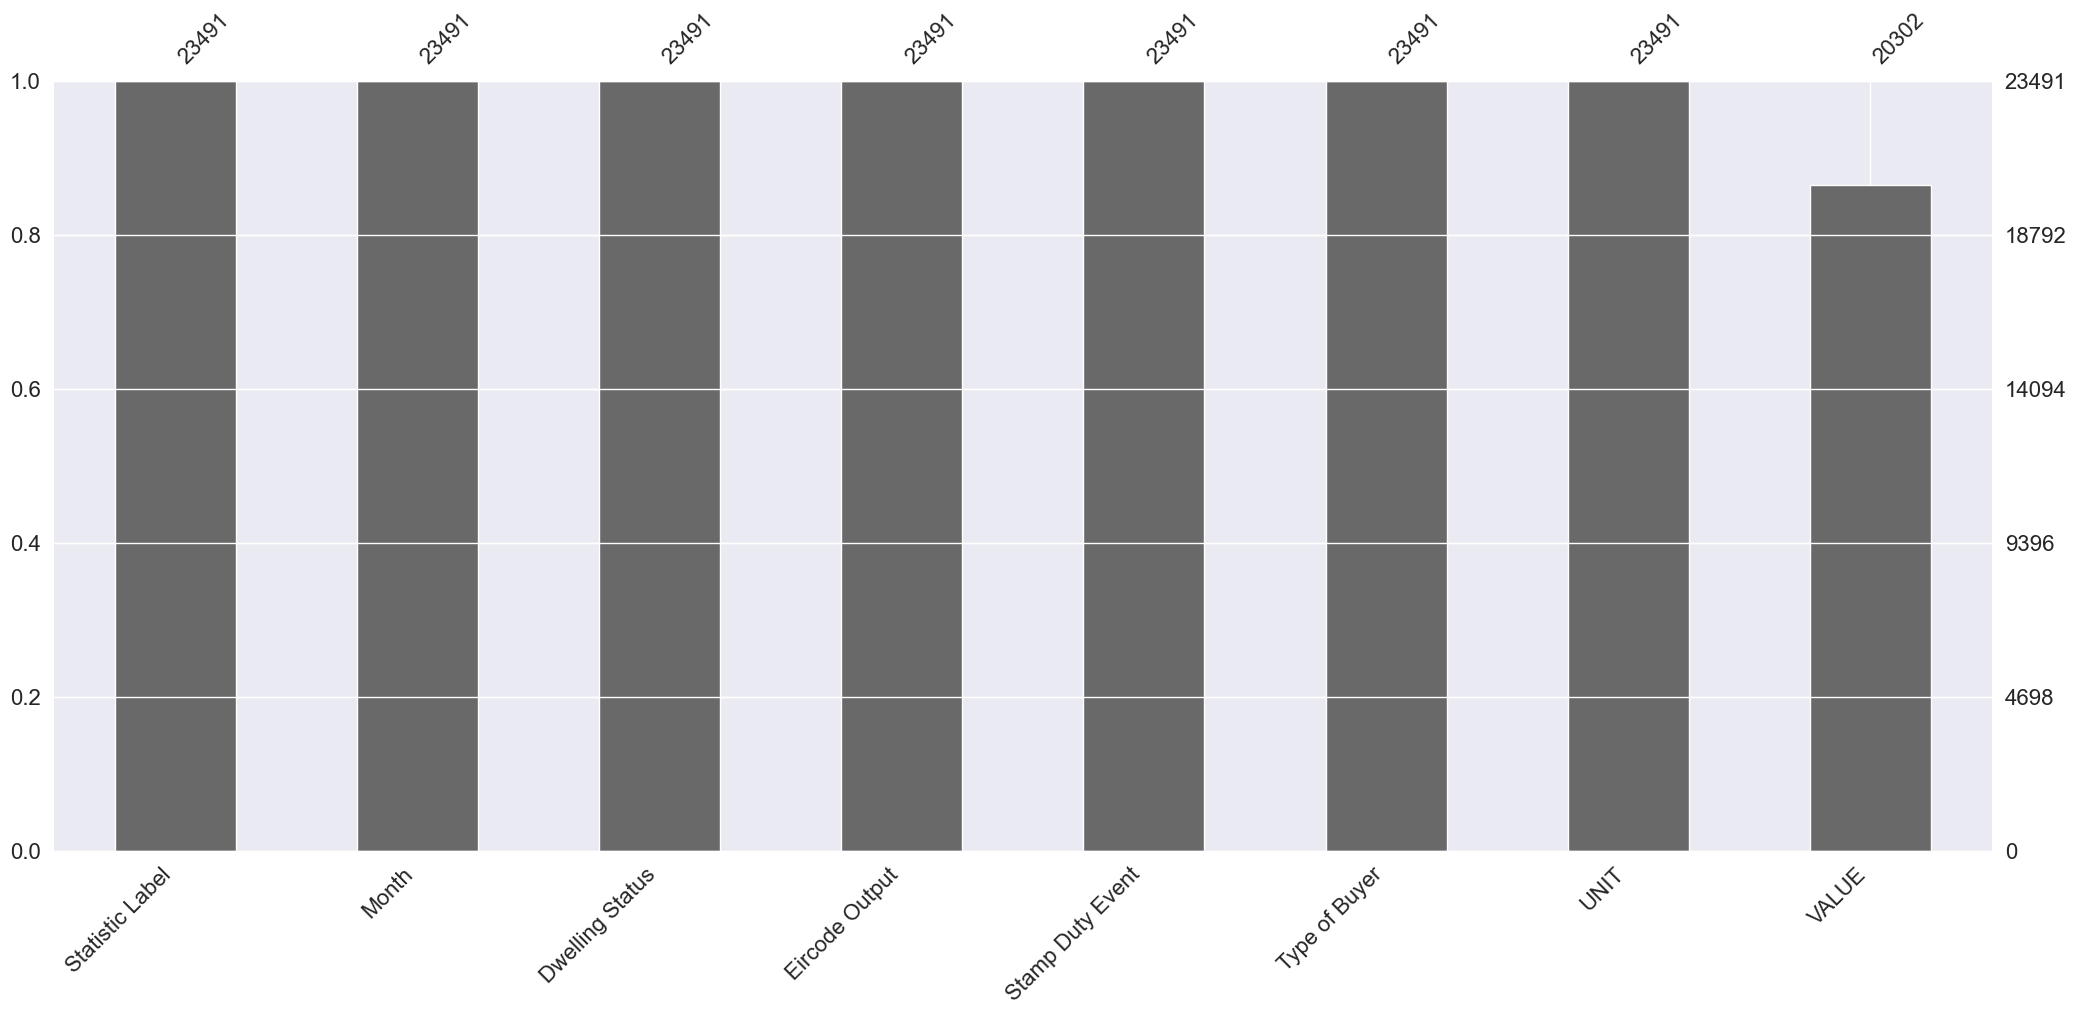

In [17]:
import missingno as msno
ax = msno.bar(df.sample(23491))

### 2.2 Replacing Values (Syntax errors)

In [18]:
df.head()

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
2,Mean Sale Price,2010 January,All Dwelling Statuses,A45: Oldtown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,322422.0
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,343425.0


Learned how to "Split strings around given separator/delimiter." (The Pandas Development Team, 2024b)

In [19]:
eir = df['Eircode Output'].str.rsplit(":", n = 1, expand = True).copy()

In [20]:
eir.shape, df.shape

((23491, 2), (23491, 8))

In [21]:
eir.head()

,0,1
0,A41,Ballyboughal
1,A42,Garristown
2,A45,Oldtown
3,A63,Greystones
4,A67,Wicklow


In [22]:
df[["Acronym", "County"]] = eir[[0, 1]]

In [23]:
df.head()

,Statistic Label,Month,Dwelling Status,Eircode Output,Stamp Duty Event,Type of Buyer,UNIT,VALUE,Acronym,County
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN,A41,Ballyboughal
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN,A42,Garristown
2,Mean Sale Price,2010 January,All Dwelling Statuses,A45: Oldtown,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,NaN,A45,Oldtown
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,322422.0,A63,Greystones
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Executions,Household Buyer - First-Time Buyer Owner-Occupier,Euro,343425.0,A67,Wicklow


### 2.3 Dropping Irrelevant Columns

- Deleting: Stamp Duty Event, UNIT

In [24]:
df = df.drop(columns = ['Stamp Duty Event', 'UNIT'])

In [25]:
df.head()

,Statistic Label,Month,Dwelling Status,Eircode Output,Type of Buyer,VALUE,Acronym,County
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Household Buyer - First-Time Buyer Owner-Occupier,NaN,A41,Ballyboughal
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Household Buyer - First-Time Buyer Owner-Occupier,NaN,A42,Garristown
2,Mean Sale Price,2010 January,All Dwelling Statuses,A45: Oldtown,Household Buyer - First-Time Buyer Owner-Occupier,NaN,A45,Oldtown
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Household Buyer - First-Time Buyer Owner-Occupier,322422.0,A63,Greystones
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Household Buyer - First-Time Buyer Owner-Occupier,343425.0,A67,Wicklow


### 2.4 Renaming Columns

- Renaming: Statistic Label to Statistic_Label, Dwelling Status to Dwelling_Status, Eircode Output to Eircode, Type of Buyer to Type_Buyer, VALUE to Value

In [26]:
df = df.rename(columns= {'Statistic Label': 'Statistic_Label', 'Dwelling Status': 'Dwelling_Status', 'Eircode Output': 'Eircode', 'Type of Buyer': 'Type_Buyer', 'VALUE': 'Value'})

In [27]:
df.head()

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County
0,Mean Sale Price,2010 January,All Dwelling Statuses,A41: Ballyboughal,Household Buyer - First-Time Buyer Owner-Occupier,NaN,A41,Ballyboughal
1,Mean Sale Price,2010 January,All Dwelling Statuses,A42: Garristown,Household Buyer - First-Time Buyer Owner-Occupier,NaN,A42,Garristown
2,Mean Sale Price,2010 January,All Dwelling Statuses,A45: Oldtown,Household Buyer - First-Time Buyer Owner-Occupier,NaN,A45,Oldtown
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Household Buyer - First-Time Buyer Owner-Occupier,322422.0,A63,Greystones
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Household Buyer - First-Time Buyer Owner-Occupier,343425.0,A67,Wicklow


### 2.5 Handling Missing Values

In [28]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--", "-", "?", "UnKnown", "Unknown", "Na", "Nan"]

In [29]:
df.replace(missing_value_formats, np.nan, inplace = True)

### 2.6 Imputing Missing Values

In [30]:
df = df.dropna(axis = 0)

Before 23491, now 20302

In [31]:
df.shape

(20302, 8)

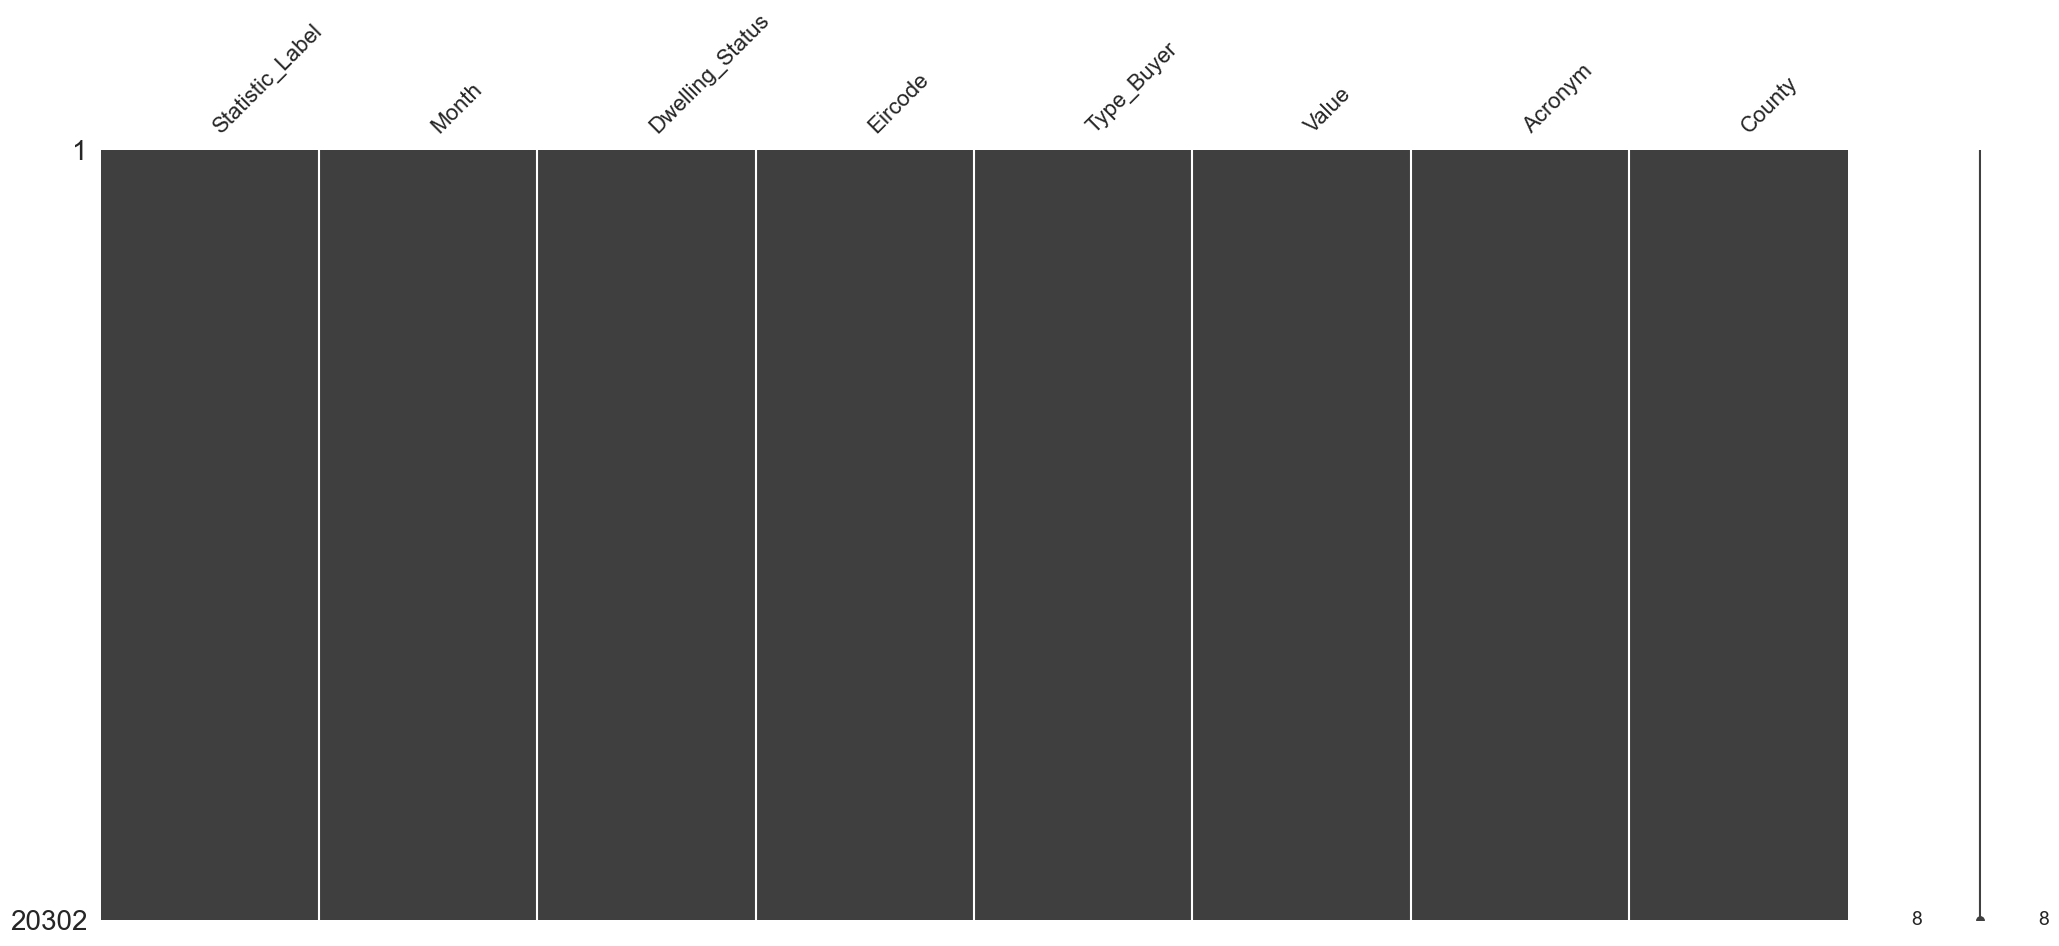

In [32]:
ax = msno.matrix(df.sample(20302))

In [33]:
df.isnull().sum()

Statistic_Label    0
Month              0
Dwelling_Status    0
Eircode            0
Type_Buyer         0
Value              0
Acronym            0
County             0
dtype: int64

In [34]:
df[df['Value'].isnull()].head()

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County


### 2.7 Handling Duplicate Rows

In [35]:
df[df.duplicated()].shape

(0, 8)

In [36]:
df.count()

Statistic_Label    20302
Month              20302
Dwelling_Status    20302
Eircode            20302
Type_Buyer         20302
Value              20302
Acronym            20302
County             20302
dtype: int64

### 2.8 Type Conversion

In [37]:
df.dtypes

Statistic_Label     object
Month               object
Dwelling_Status     object
Eircode             object
Type_Buyer          object
Value              float64
Acronym             object
County              object
dtype: object

In [38]:
df.head(2)

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Household Buyer - First-Time Buyer Owner-Occupier,322422.0,A63,Greystones
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Household Buyer - First-Time Buyer Owner-Occupier,343425.0,A67,Wicklow


### 2.9 Relationships

In [39]:
df.columns

Index(['Statistic_Label', 'Month', 'Dwelling_Status', 'Eircode', 'Type_Buyer',
       'Value', 'Acronym', 'County'],
      dtype='object')

### 2.10 Statistical Analysis

In [40]:
df.columns

Index(['Statistic_Label', 'Month', 'Dwelling_Status', 'Eircode', 'Type_Buyer',
       'Value', 'Acronym', 'County'],
      dtype='object')

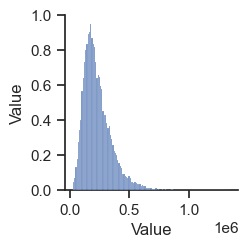

In [41]:
sns.set_theme(style = "ticks")
sns.pairplot(df[['Value']])

<Axes: xlabel='Value', ylabel='Density'>

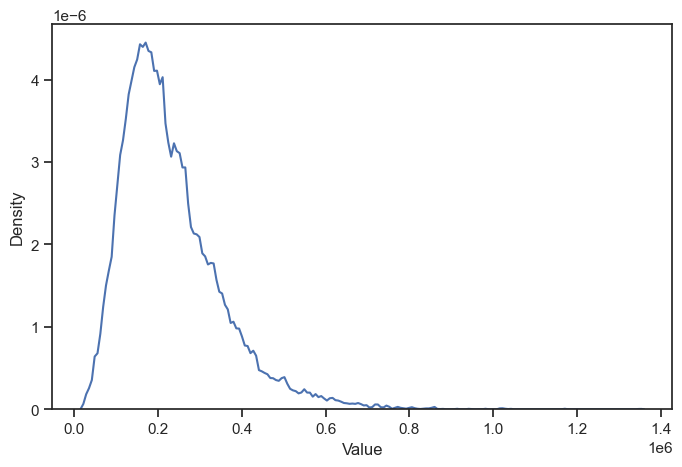

In [42]:
plt.figure(figsize = (8, 5))
sns.kdeplot(data = df, x = "Value", bw_adjust = .2)

<Axes: >

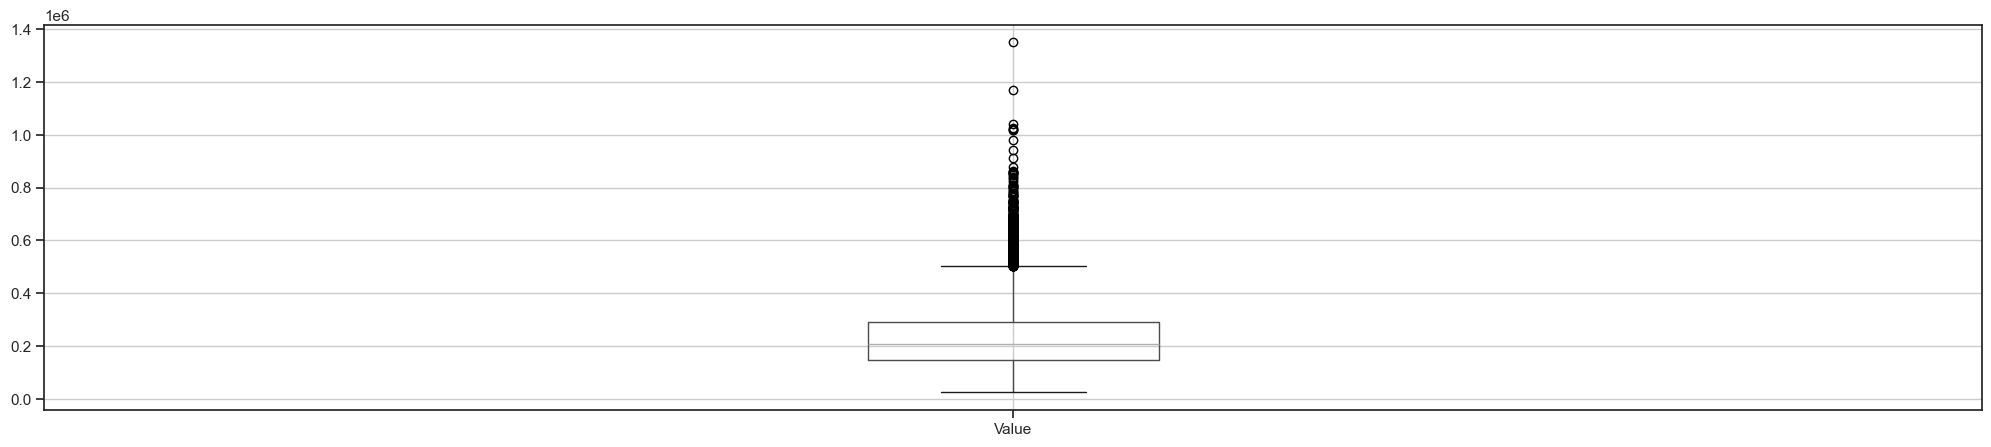

In [43]:
df.boxplot(figsize = (25, 5))

In [44]:
df.columns

Index(['Statistic_Label', 'Month', 'Dwelling_Status', 'Eircode', 'Type_Buyer',
       'Value', 'Acronym', 'County'],
      dtype='object')

In [45]:
df['County'].unique

<bound method Series.unique of 3             Greystones
4                Wicklow
5           Castleblaney
6         Carrickmacross
7                  Kells
              ...       
23485          Waterford
23486             Arklow
23487        Enniscorthy
23488              Gorey
23490            Wexford
Name: County, Length: 20302, dtype: object>

In [46]:
df['County'].value_counts()

County
 Celbridge       169
 Dublin 13       169
 Dublin 15       169
 Dublin 16       169
 Waterford       169
                ... 
 Clones           52
 Garristown       44
 Ballyboughal     35
 Clifden          34
 Oldtown          30
Name: count, Length: 139, dtype: int64

In [47]:
# df['Acronym'].head() 
#df[(df['County'] == 'Dublin 01') & (df['Type of Buyer'] == '1')].head(10)

# df[df['County'] == "Wicklow"].head(10)
df[df["Acronym"] == "D01"].head()

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County
18,Mean Sale Price,2010 January,All Dwelling Statuses,D01: Dublin 1,Household Buyer - First-Time Buyer Owner-Occupier,212500.0,D01,Dublin 1
157,Mean Sale Price,2010 February,All Dwelling Statuses,D01: Dublin 1,Household Buyer - First-Time Buyer Owner-Occupier,272413.0,D01,Dublin 1
296,Mean Sale Price,2010 March,All Dwelling Statuses,D01: Dublin 1,Household Buyer - First-Time Buyer Owner-Occupier,225496.0,D01,Dublin 1
435,Mean Sale Price,2010 April,All Dwelling Statuses,D01: Dublin 1,Household Buyer - First-Time Buyer Owner-Occupier,215750.0,D01,Dublin 1
574,Mean Sale Price,2010 May,All Dwelling Statuses,D01: Dublin 1,Household Buyer - First-Time Buyer Owner-Occupier,166200.0,D01,Dublin 1


In [48]:
# df['Acronym'].value_counts()

In [49]:
# labels = df['Acronym'].unique()

In [50]:
# valuesAlbumType = df['Acronym'].value_counts()

# # labels = ['All Buyer Types', 'Household Buyer - First-Time Buyer Owner-Occupier', 'Household Buyer - Former Owner-Occupier', 'Household Buyer - Non-Occupier']
# # explode = [0.1, 0, 0, 0]
# # colors = ["c", "r", "g", "y"]

# plt.pie(valuesAlbumType, labels = labels, shadow = True, autopct='%.0f%%')
# plt.show() 

### 2.11 OrdinalEncoder

In [51]:
df.head()

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Household Buyer - First-Time Buyer Owner-Occupier,322422.0,A63,Greystones
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Household Buyer - First-Time Buyer Owner-Occupier,343425.0,A67,Wicklow
5,Mean Sale Price,2010 January,All Dwelling Statuses,A75: Castleblaney,Household Buyer - First-Time Buyer Owner-Occupier,203750.0,A75,Castleblaney
6,Mean Sale Price,2010 January,All Dwelling Statuses,A81: Carrickmacross,Household Buyer - First-Time Buyer Owner-Occupier,209975.0,A81,Carrickmacross
7,Mean Sale Price,2010 January,All Dwelling Statuses,A82: Kells,Household Buyer - First-Time Buyer Owner-Occupier,189245.0,A82,Kells


Importing `OrdinalEncoder` from `sklearn` to Encoder Categorical data

In [52]:
from sklearn.preprocessing import OrdinalEncoder

Created the variable `unit` to save just the specific values that exists in the `UNIT` feature 

In [53]:
county = df['County'].unique()
county

array([' Greystones', ' Wicklow', ' Castleblaney', ' Carrickmacross',
       ' Kells', ' Enfield', ' Ashbourne', ' Dunboyne', ' Dundalk',
       ' Drogheda', ' Blackrock', ' Glenageary', ' Bray', ' Navan',
       ' Dublin 1', ' Dublin 2', ' Dublin 3', ' Dublin 4', ' Dublin 5',
       ' Dublin 6', ' Dublin 7', ' Dublin 8', ' Dublin 9', ' Dublin 11',
       ' Dublin 12', ' Dublin 13', ' Dublin 14', ' Dublin 15',
       ' Dublin 16', ' Dublin 17', ' Dublin 18', ' Dublin 22',
       ' Dublin 24', ' Dublin 6W', ' Cahir', ' Carrick-on-Suir',
       ' Tipperary', ' Thurles', ' Nenagh', ' Roscrea', ' Clonmel',
       ' Claremorris', ' Castlebar', ' Ballina', ' Ballyhaunis',
       ' Roscommon', ' Castlerea', ' Ballymote', ' Sligo', ' Letterkenny',
       ' Lifford', ' Donegal', ' Cavan', ' Belturbet', ' Ballinasloe',
       ' Tuam', ' Loughrea', ' Athenry', ' Galway', ' Balbriggan',
       ' Skerries', ' Malahide', ' Rush', ' Swords', ' Lucan', ' Athlone',
       ' Longford', ' Carrick-on-Shan

In [54]:
df['County'].value_counts()

County
 Celbridge       169
 Dublin 13       169
 Dublin 15       169
 Dublin 16       169
 Waterford       169
                ... 
 Clones           52
 Garristown       44
 Ballyboughal     35
 Clifden          34
 Oldtown          30
Name: count, Length: 139, dtype: int64

Defined ordinal encoding and giving the specific values

In [55]:
encoder = OrdinalEncoder(categories = [county])

Transforming and copying the values to the feature `'county'` 

In [56]:
df['Eir_encoder'] = encoder.fit_transform(df[['County']])

Checking with the command "`.head()`" what the data set looks like now.

In [57]:
df.head(2)

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County,Eir_encoder
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Household Buyer - First-Time Buyer Owner-Occupier,322422.0,A63,Greystones,0.0
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Household Buyer - First-Time Buyer Owner-Occupier,343425.0,A67,Wicklow,1.0


In [58]:
df['Eir_encoder'].value_counts()

Eir_encoder
100.0    169
25.0     169
27.0     169
28.0     169
103.0    169
        ... 
137.0     52
127.0     44
138.0     35
129.0     34
128.0     30
Name: count, Length: 139, dtype: int64

### 2.12 Scaling / Transformation

In [59]:
df.head()

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County,Eir_encoder
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Household Buyer - First-Time Buyer Owner-Occupier,322422.0,A63,Greystones,0.0
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Household Buyer - First-Time Buyer Owner-Occupier,343425.0,A67,Wicklow,1.0
5,Mean Sale Price,2010 January,All Dwelling Statuses,A75: Castleblaney,Household Buyer - First-Time Buyer Owner-Occupier,203750.0,A75,Castleblaney,2.0
6,Mean Sale Price,2010 January,All Dwelling Statuses,A81: Carrickmacross,Household Buyer - First-Time Buyer Owner-Occupier,209975.0,A81,Carrickmacross,3.0
7,Mean Sale Price,2010 January,All Dwelling Statuses,A82: Kells,Household Buyer - First-Time Buyer Owner-Occupier,189245.0,A82,Kells,4.0


In [60]:
df["Value"].describe().round(2)

count      20302.00
mean      231380.26
std       118600.78
min        25000.00
25%       148190.25
50%       206666.00
75%       290000.00
max      1350000.00
Name: Value, dtype: float64

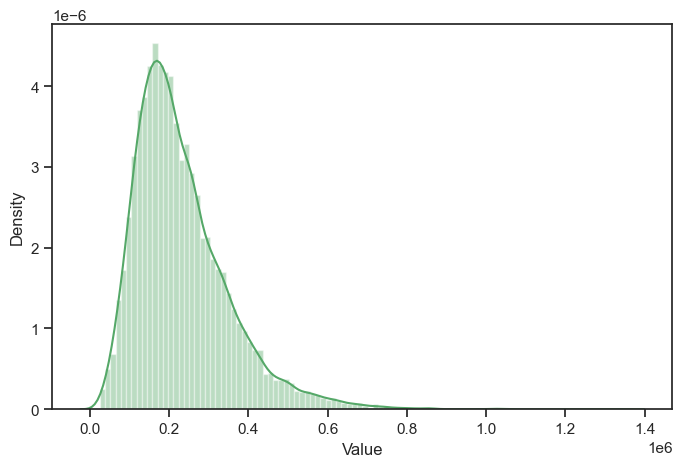

In [61]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Value'], color='g', bins=100, hist_kws = {'alpha': 0.4});

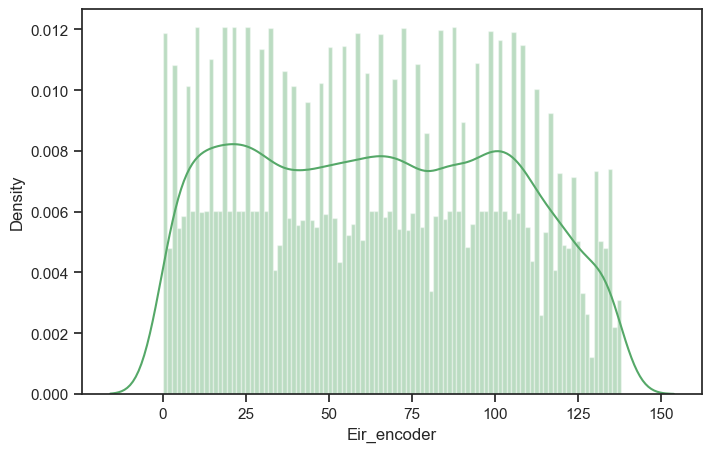

In [62]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Eir_encoder'], color='g', bins=100, hist_kws = {'alpha': 0.4});

In [63]:
df.columns

Index(['Statistic_Label', 'Month', 'Dwelling_Status', 'Eircode', 'Type_Buyer',
       'Value', 'Acronym', 'County', 'Eir_encoder'],
      dtype='object')

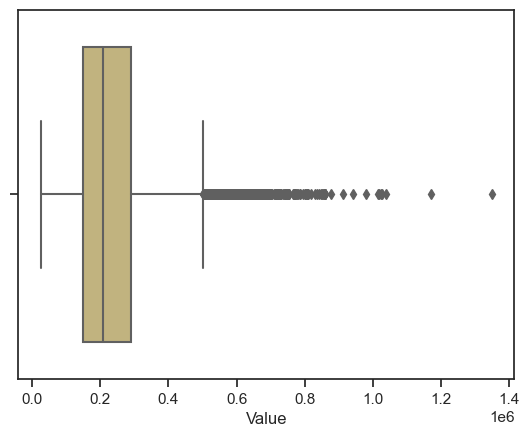

In [64]:
sns.boxplot(x = df['Value'], color="y")
plt.show()

<Axes: >

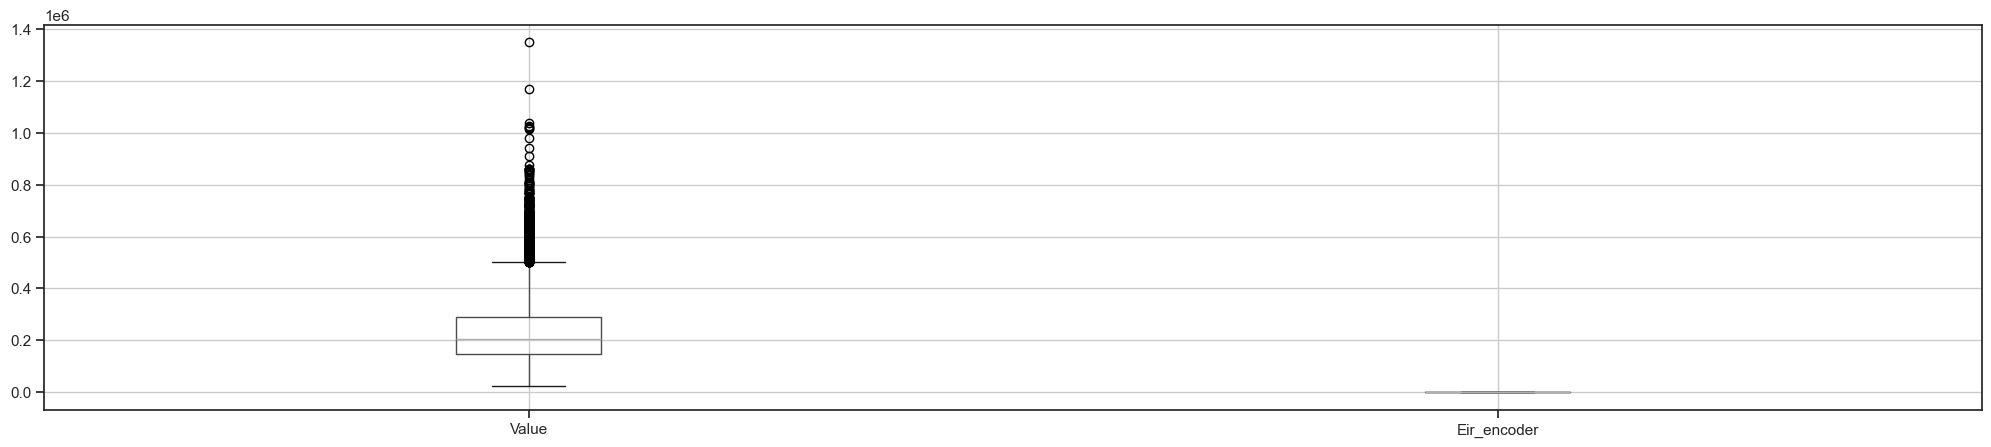

In [65]:
df.boxplot(figsize = (25, 5))

### 2.13 Dealing Outliers

In [66]:
df_outliers = df.copy()

In [67]:
Q1 = df_outliers.select_dtypes(include = ['number']).quantile(0.25)
Q3 = df_outliers.select_dtypes(include = ['number']).quantile(0.75)
IQR = Q3 - Q1

In [68]:
df_outliers = df_outliers[~((df_outliers.select_dtypes(include = ['number']) < (Q1 - 1.5 * IQR)) | 
                            (df_outliers.select_dtypes(include = ['number']) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [69]:
df.shape, df_outliers.shape

((20302, 9), (19642, 9))

<Axes: >

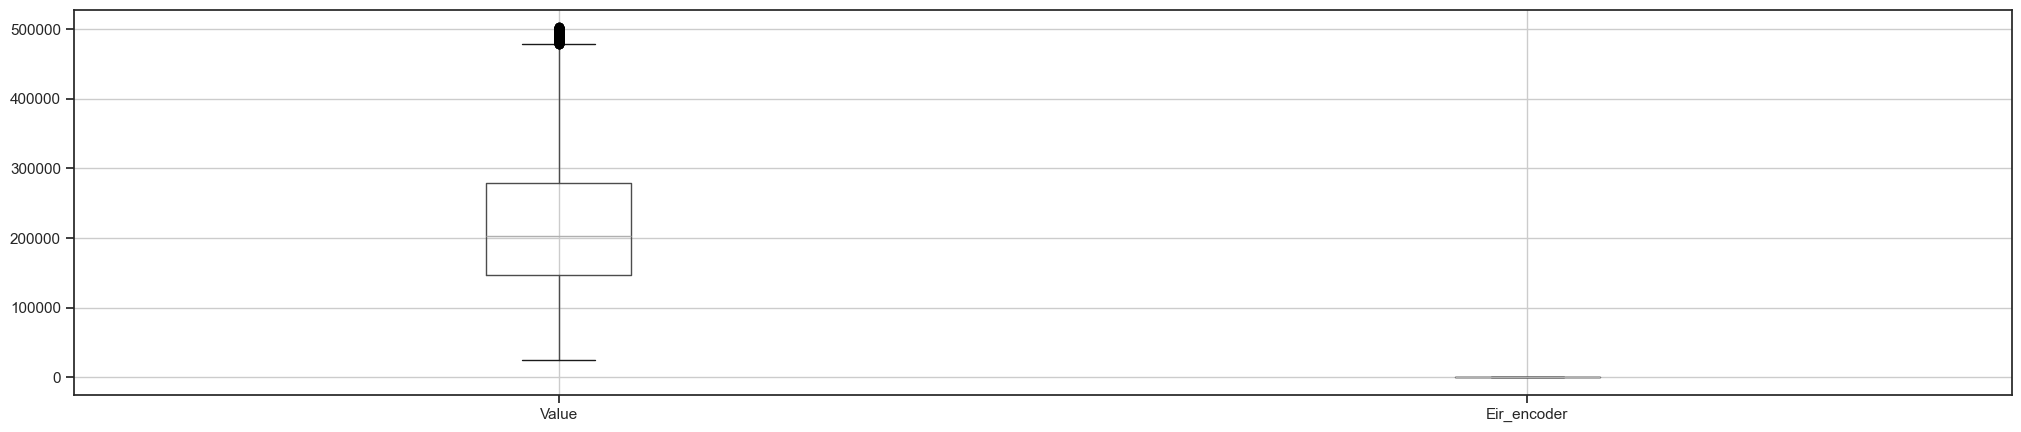

In [70]:
df_outliers.boxplot(figsize = (25, 5))

In [71]:
df_outliers.head(2)

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County,Eir_encoder
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Household Buyer - First-Time Buyer Owner-Occupier,322422.0,A63,Greystones,0.0
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Household Buyer - First-Time Buyer Owner-Occupier,343425.0,A67,Wicklow,1.0


,Value,Eir_encoder
Value,1.000000,-0.243402
Eir_encoder,-0.243402,1.000000


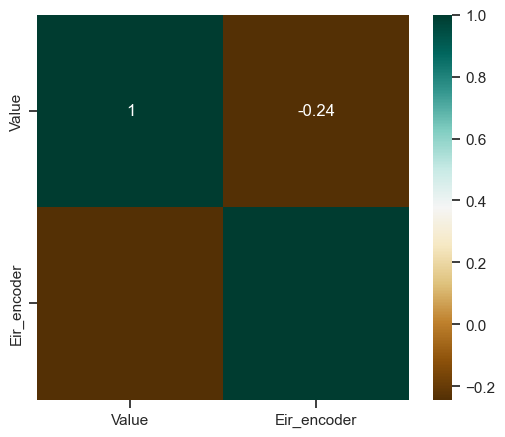

In [72]:
df_numeric = df_outliers.select_dtypes(include = ['number'])

plt.figure(figsize = (6, 5))
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, cmap = "BrBG", annot = True)
correlation_matrix

In [73]:
from sklearn import preprocessing

In [74]:
df_scaled = df_outliers.copy()

In [75]:
df.columns

Index(['Statistic_Label', 'Month', 'Dwelling_Status', 'Eircode', 'Type_Buyer',
       'Value', 'Acronym', 'County', 'Eir_encoder'],
      dtype='object')

In [76]:
df_scaled[['Value']] = preprocessing.scale(df_outliers[['Value']])

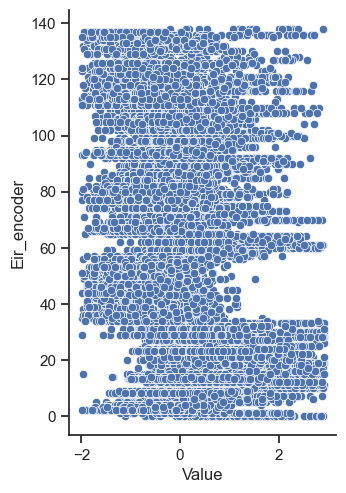

In [77]:
sns.pairplot(df_scaled, x_vars = ['Value'], y_vars = 'Eir_encoder', size = 5, aspect = 0.7, kind = 'scatter')

In [78]:
df_scaled.head()

,Statistic_Label,Month,Dwelling_Status,Eircode,Type_Buyer,Value,Acronym,County,Eir_encoder
3,Mean Sale Price,2010 January,All Dwelling Statuses,A63: Greystones,Household Buyer - First-Time Buyer Owner-Occupier,1.065026,A63,Greystones,0.0
4,Mean Sale Price,2010 January,All Dwelling Statuses,A67: Wicklow,Household Buyer - First-Time Buyer Owner-Occupier,1.281149,A67,Wicklow,1.0
5,Mean Sale Price,2010 January,All Dwelling Statuses,A75: Castleblaney,Household Buyer - First-Time Buyer Owner-Occupier,-0.156120,A75,Castleblaney,2.0
6,Mean Sale Price,2010 January,All Dwelling Statuses,A81: Carrickmacross,Household Buyer - First-Time Buyer Owner-Occupier,-0.092064,A81,Carrickmacross,3.0
7,Mean Sale Price,2010 January,All Dwelling Statuses,A82: Kells,Household Buyer - First-Time Buyer Owner-Occupier,-0.305378,A82,Kells,4.0


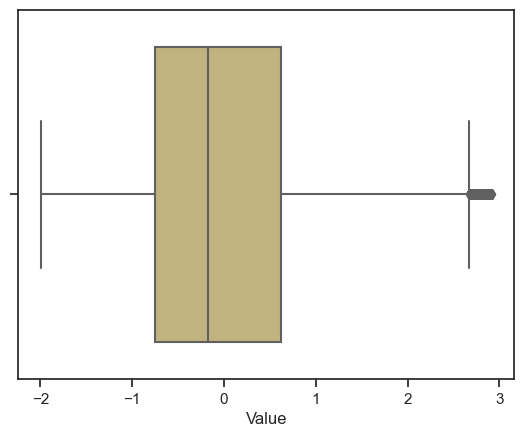

In [79]:
sns.boxplot(x = df_scaled['Value'], color="y")
plt.show()

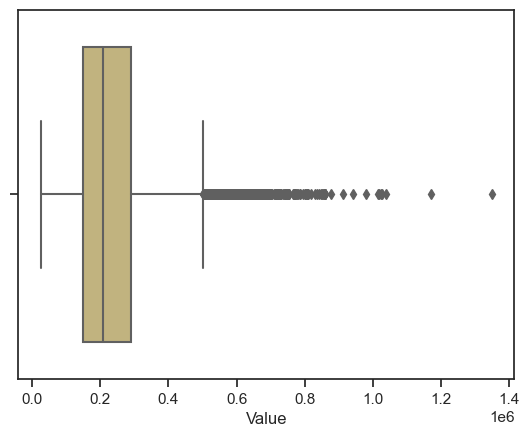

In [80]:
sns.boxplot(x = df['Value'], color="y")
plt.show()

## 3. Machine Learning

### 3.1 Principal Component Analysis (PCA)

In [81]:
df_machine = df_scaled.copy()

In [82]:
no_label = df_machine.select_dtypes(include = ['number'])

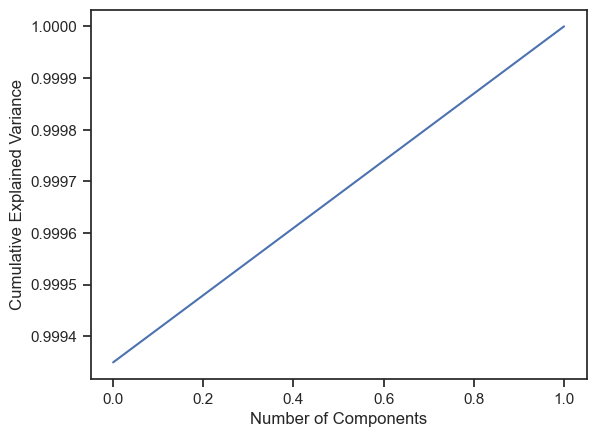

In [83]:
from sklearn.decomposition import PCA
pca = PCA().fit(no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of Components') 
plt.ylabel('Cumulative Explained Variance'); 

### 3.2 Linear Regression

In [84]:
df_machine.columns

Index(['Statistic_Label', 'Month', 'Dwelling_Status', 'Eircode', 'Type_Buyer',
       'Value', 'Acronym', 'County', 'Eir_encoder'],
      dtype='object')

In [85]:
X = df_machine['Eir_encoder']
X.head()

3    0.0
4    1.0
5    2.0
6    3.0
7    4.0
Name: Eir_encoder, dtype: float64

In [86]:
y = df_machine['Value']
y.head()

3    1.065026
4    1.281149
5   -0.156120
6   -0.092064
7   -0.305378
Name: Value, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 , random_state = 100)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19642,), (19642,), (13749,), (5893,), (13749,), (5893,))

In [88]:
import numpy as np

X_train = X_train.to_numpy()[:, np.newaxis]
X_test = X_test.to_numpy()[:, np.newaxis]

In [89]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [90]:
print(lr.intercept_)
print(lr.coef_)

0.4305745980362892
[-0.00648021]


In [91]:
y_pred = lr.predict(X_test)

In [92]:
type(y_pred)

numpy.ndarray

Text(0, 0.5, 'Sales')

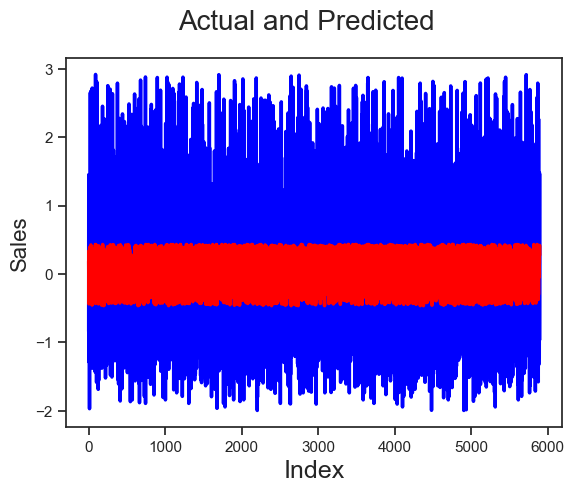

In [93]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,5894,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

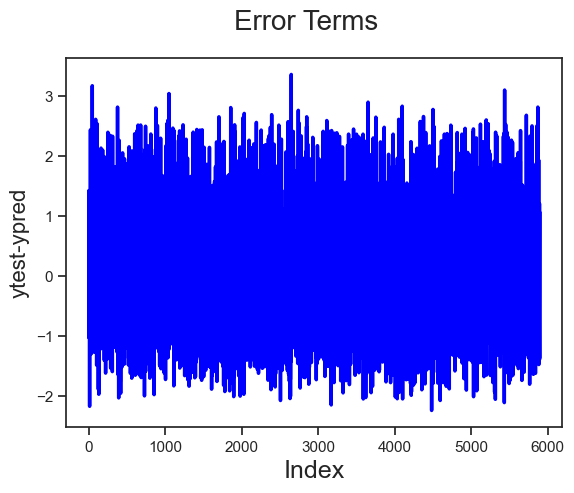

In [94]:
# Error terms
c = [i for i in range(1,5894,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [96]:
r_squared = r2_score(y_test, y_pred)

In [97]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.9534120760508409
r_square_value : 0.055862711221764116


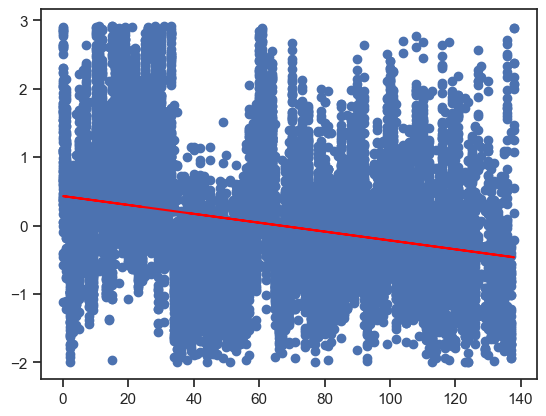

In [98]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red')
plt.show()

---

## Conclusions

Old dataset
- Statistic - 1: Volume of Sales, 2: Value of Sales, 3: Mean Sale Price and 4: Median Price
- Dwelling Status - 1: All Dwelling Statuses, 2: New and 3: Existing
- Stamp Duty Event - 1: Filings and 2: Executions
- Type of Buyer - 1: All Buyer Types, 2: Household Buyer - First-Time Buyer Owner-Occupier, 3: Household Buyer - Former Owner-Occupier and 4: Household Buyer - Non-Occupier

---

## Data Dictionary

**Statistic_Label**
- Mean Sale Price: Mean Sale Price (Euro)

**Month**
- Rage from 2010 January to 2024 January

**Dwelling Status -> Dwelling_Status**
- All Dwelling Statuses

**Eircode Output -> Eircode**
- Eircodes

**Stamp Duty Event** 
- Executions

**Type of Buyer -> Type_Buyer** 
- Household Buyer - First-Time Buyer Owner-Occupier

**UNIT**
- Euro

**VALUE -> Value**
Price of the property

---
**New Columns**
- **Acronym** County Acronym
- **County** County Name
- **Eir_encoder** Eircodes encoded 

---

## References

Müller, A.C. and Guido, S. (2017). Introduction to Machine Learning with Python: A guide for Data Scientists. Beijing: O’reilly.

The Pandas Development Team (2024a). How do I select a subset of a DataFrame? — pandas 1.2.4 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html.

The Pandas Development Team (2024b). pandas.Series.str.split — pandas 1.3.0 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html.